In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [10]:
def import_dta(link):
    name = pd.read_stata(link)
    return name

### Exercise 1.1

In [11]:
USpop = import_dta("C:\\Users\\gonza\\Documents\\Python\\TSA\\USpop.dta")

In [12]:
USpop.tail()

,uspop
18,203.302031
19,226.542203
20,248.709873
21,NaN
22,NaN


In [13]:
USpop['time'] = pd.Series(pd.period_range('1/1/1790', freq='10Y', periods=23))
USpop['time'] = USpop.time.values.astype('datetime64[Y]')
# pd.date_range('1/1/2000', periods=8)

In [14]:
#USpop.set_index(time, inplace = True)
USpop = USpop.dropna()
USpop

,uspop,time
0,3.929214,1790-01-01
1,5.308483,1800-01-01
2,7.239881,1810-01-01
3,9.638453,1820-01-01
4,12.860702,1830-01-01
5,17.063353,1840-01-01
6,23.191876,1850-01-01
7,31.443321,1860-01-01
8,38.558371,1870-01-01
9,50.189209,1880-01-01


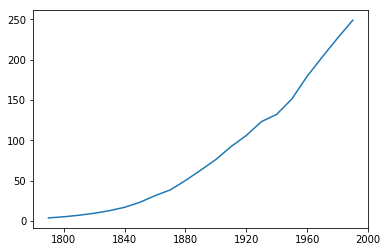

In [15]:
fig, ax = plt.subplots()
ax.plot(USpop['time'], USpop['uspop'])

### Exercise 1.2

In [111]:
y = np.asarray(USpop['time'].dt.year)
y = y.reshape(21, 1)
y

array([[1790],
       [1800],
       [1810],
       [1820],
       [1830],
       [1840],
       [1850],
       [1860],
       [1870],
       [1880],
       [1890],
       [1900],
       [1910],
       [1920],
       [1930],
       [1940],
       [1950],
       [1960],
       [1970],
       [1980],
       [1990]], dtype=int64)

In [87]:
X = USpop['uspop'].values.reshape(-1, 1)
reg = LinearRegression().fit(y, X)


In [18]:
print('int:', reg.intercept_)
print('beta_1:', reg.coef_)
pred = reg.predict(y)

int: [-2211.33757044]
beta_1: [[1.21540751]]


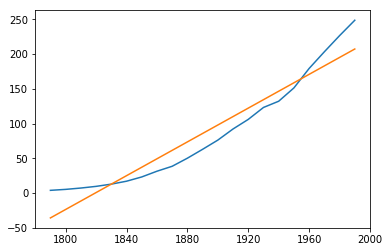

In [19]:
fig, ax = plt.subplots()
ax.plot(USpop['time'], USpop['uspop'])
ax.plot(USpop['time'], pred)

Residuals should fluctuate randomly around zero. Not the case here. Our model is inapropriate.

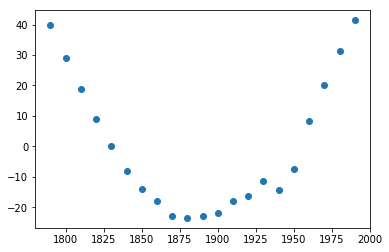

In [20]:
fig, ax = plt.subplots()
res = X - pred
ax.scatter(y, res)

### Exercise 1.3

In [41]:
lnX = np.log(X)

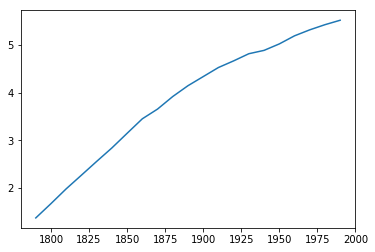

In [22]:
fig, ax = plt.subplots()
ax.plot(y, lnX)

In [23]:
regln = LinearRegression().fit(y, lnX)

In [24]:
print('int:', regln.intercept_)
print('beta_1:', regln.coef_)
actpred = np.exp(regln.intercept_ + regln.coef_ * y)

int: [-35.41251997]
beta_1: [[0.020769]]


In the slides the graph is done with the values with two digits after the comma, that's why the graphs look different.

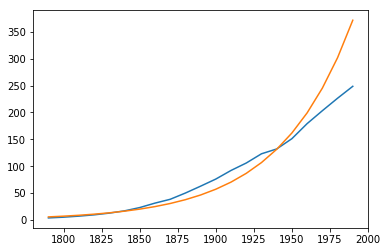

In [25]:
fig, ax = plt.subplots()
ax.plot(y, X)
ax.plot(y, actpred)
#ax.plot(USpop['time'], USpop['uspop'])

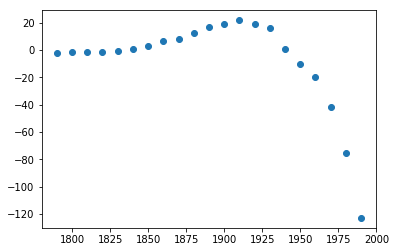

In [26]:
fig, ax = plt.subplots()
resln = X - actpred
ax.scatter(y, resln)

### Exercise 1.4

In [27]:
print((USpop['uspop'][1] - USpop['uspop'][0])/USpop['uspop'][0])
print(np.log(USpop['uspop'][1]) - np.log(USpop['uspop'][0]))

0.3510292389266657
0.30086670117663283


### Exercise 1.5

In [57]:
i = USpop.index[USpop['time'] == '1900-01-01']
print(i.astype(int))

Int64Index([11], dtype='int64')


In [58]:
#USpre20 = USpop.iloc[0:13, :]
#USafter20 = USpop.iloc[13:, :]

In [59]:
lnXp00 = np.log(X[0:11])
lnXa00 = np.log(X[11:])

In [60]:
regp00 = LinearRegression().fit(y[0:11], lnXp00)
rega00 = LinearRegression().fit(y[11:], lnXa00)

In [61]:
predp00 = np.exp(regp00.intercept_ + regp00.coef_ * y[0:11])
preda00 = np.exp(rega00.intercept_ + rega00.coef_ * y[11:])

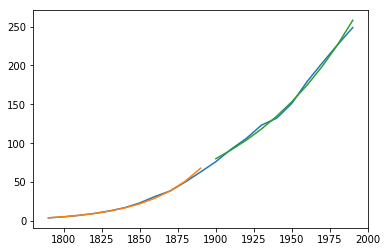

In [62]:
fig, ax = plt.subplots()
ax.plot(y, USpop['uspop'])
ax.plot(y[0:11], predp00)
ax.plot(y[11:], preda00)

### Exercise 1.6

In [112]:
y2 = np.c_[y, y**2]
y2

array([[   1790, 3204100],
       [   1800, 3240000],
       [   1810, 3276100],
       [   1820, 3312400],
       [   1830, 3348900],
       [   1840, 3385600],
       [   1850, 3422500],
       [   1860, 3459600],
       [   1870, 3496900],
       [   1880, 3534400],
       [   1890, 3572100],
       [   1900, 3610000],
       [   1910, 3648100],
       [   1920, 3686400],
       [   1930, 3724900],
       [   1940, 3763600],
       [   1950, 3802500],
       [   1960, 3841600],
       [   1970, 3880900],
       [   1980, 3920400],
       [   1990, 3960100]], dtype=int64)

In [113]:
regq = LinearRegression().fit(y2, X)
predq = regq.predict(y2)
resq = X - predq
y2 = y2[:,0]

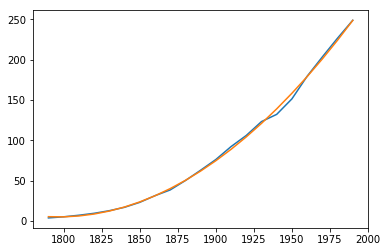

In [118]:
fig, ax = plt.subplots()
ax.plot(y, USpop['uspop'])
ax.plot(y, predq)

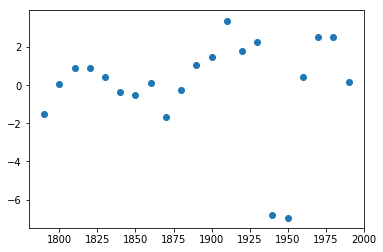

In [114]:
fig, ax = plt.subplots()
ax.scatter(y2, resq)

In [115]:
y3 = np.c_[y, y**2, y**3]
regc = LinearRegression().fit(y3, X)
predc = regc.predict(y3)
resc = X - predc
y3 = y3[:,0]

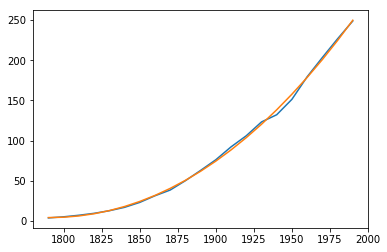

In [119]:
fig, ax = plt.subplots()
ax.plot(y, USpop['uspop'])
ax.plot(y, predc)

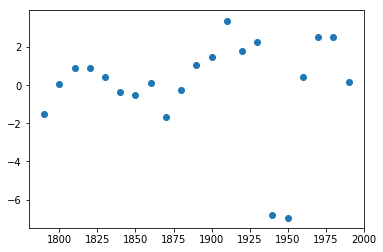

In [116]:
fig, ax = plt.subplots()
ax.scatter(y3, resq)

### Exercise 1.7

### Exercise 1.8

In [50]:
def ma(series, alpha = 0.3):
    start = series[0]
    ma = []
    for i in range(len(series)):
        if i == 0:
            ma.append(start)
        if i > 0:
            ma.append(alpha * series[i] + (1-alpha)*ma[i-1])
    return ma

In [43]:
oil['ma'] = ma(oil['oil'], 82.6)

### Exercise 1.9, 1.10 and 1.11

In [4]:
oil = import_dta("C:\\Users\\gonza\\Documents\\Python\\TSA\\oil.dta")

In [7]:
oil.shape

(105, 2)

In [14]:
oil['time'] = pd.Series(pd.period_range('2000-01', freq='1M', periods=105))
oil['time'] = oil.time.values.astype('datetime64[M]')

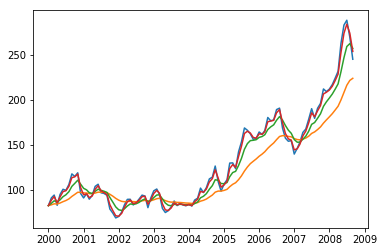

In [46]:
fig, ax = plt.subplots()
ax.plot(oil['time'], oil['oil'])
ax.plot(oil['time'], ma(oil['oil'], 82.6, alpha = 0.1))
ax.plot(oil['time'], ma(oil['oil'], 82.6, alpha = 0.3))
ax.plot(oil['time'], ma(oil['oil'], 82.6, alpha = 0.7))

### Exercise 1.13

In [47]:
sie = import_dta("C:\\Users\\gonza\\Documents\\Python\\TSA\\Siemens.dta")

In [52]:
sie['ma'] = ma(sie['SIE'])

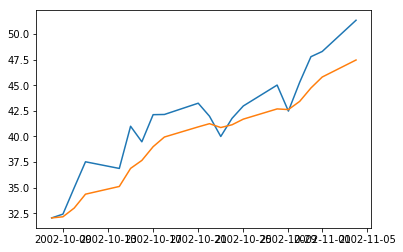

In [54]:
fig, ax = plt.subplots()
ax.plot(sie['time'], sie['SIE'])
ax.plot(sie['time'], sie['ma'])

### Exercise 1.14